In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io, zipfile

sns.set(style="whitegrid")

print("👉 Please upload your Spotify dataset (.csv or .zip)")
uploaded = files.upload()

👉 Please upload your Spotify dataset (.csv or .zip)


Saving spotify_dataset.zip to spotify_dataset.zip


In [9]:

for fn in uploaded.keys():
    if fn.endswith(".zip"):
        with zipfile.ZipFile(io.BytesIO(uploaded[fn]), 'r') as z:
            z.extractall("/content/")

            file_name = 'spotify_tracks.csv'
            if file_name in z.namelist():
                df = pd.read_csv(f"/content/{file_name}")
            else:
                print(f"Error: '{file_name}' not found in the zip archive.")

                df = None

    else:
        df = pd.read_csv(io.BytesIO(uploaded[fn]))

if df is not None:
  print("✅ Dataset Loaded Successfully!")
  print("Shape:", df.shape)
  display(df.head())
else:
  print("❌ Dataset loading failed.")

✅ Dataset Loaded Successfully!
Shape: (62317, 22)


,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language
0,2r0ROhr7pRN4MXDMT1fEmd,"Leo Das Entry (From ""Leo"")",Anirudh Ravichander,2024,59,https://i.scdn.co/image/ab67616d0000b273ce9c65...,"Leo Das Entry (From ""Leo"")",0.0241,0.753,97297.0,...,8.0,0.1000,-5.994,0.0,0.1030,110.997,4.0,0.459,https://open.spotify.com/track/2r0ROhr7pRN4MXD...,Tamil
1,4I38e6Dg52a2o2a8i5Q5PW,AAO KILLELLE,"Anirudh Ravichander, Pravin Mani, Vaishali Sri...",2024,47,https://i.scdn.co/image/ab67616d0000b273be1b03...,AAO KILLELLE,0.0851,0.780,207369.0,...,10.0,0.0951,-5.674,0.0,0.0952,164.995,3.0,0.821,https://open.spotify.com/track/4I38e6Dg52a2o2a...,Tamil
2,59NoiRhnom3lTeRFaBzOev,Mayakiriye Sirikiriye - Orchestral EDM,"Anirudh Ravichander, Anivee, Alvin Bruno",2024,35,https://i.scdn.co/image/ab67616d0000b27334a1dd...,Mayakiriye Sirikiriye (Orchestral EDM),0.0311,0.457,82551.0,...,2.0,0.0831,-8.937,0.0,0.1530,169.996,4.0,0.598,https://open.spotify.com/track/59NoiRhnom3lTeR...,Tamil
3,5uUqRQd385pvLxC8JX3tXn,Scene Ah Scene Ah - Experimental EDM Mix,"Anirudh Ravichander, Bharath Sankar, Kabilan, ...",2024,24,https://i.scdn.co/image/ab67616d0000b27332e623...,Scene Ah Scene Ah (Experimental EDM Mix),0.2270,0.718,115831.0,...,7.0,0.1240,-11.104,1.0,0.4450,169.996,4.0,0.362,https://open.spotify.com/track/5uUqRQd385pvLxC...,Tamil
4,1KaBRg2xgNeCljmyxBH1mo,Gundellonaa X I Am A Disco Dancer - Mashup,"Anirudh Ravichander, Benny Dayal, Leon James, ...",2024,22,https://i.scdn.co/image/ab67616d0000b2735a59b6...,Gundellonaa X I Am a Disco Dancer (Mashup),0.0153,0.689,129621.0,...,7.0,0.3450,-9.637,1.0,0.1580,128.961,4.0,0.593,https://open.spotify.com/track/1KaBRg2xgNeCljm...,Tamil


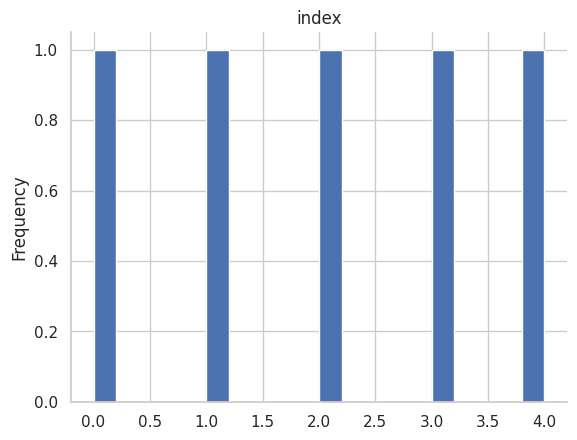

In [6]:
from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
print("\nDataset Info:\n")
df.info()
print("\nSummary Statistics:\n", df.describe())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62317 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62317 non-null  object 
 1   track_name        62317 non-null  object 
 2   artist_name       62317 non-null  object 
 3   year              62317 non-null  int64  
 4   popularity        62317 non-null  int64  
 5   artwork_url       62317 non-null  object 
 6   album_name        62317 non-null  object 
 7   acousticness      62317 non-null  float64
 8   danceability      62317 non-null  float64
 9   duration_ms       62317 non-null  float64
 10  energy            62317 non-null  float64
 11  instrumentalness  62317 non-null  float64
 12  key               62317 non-null  float64
 13  liveness          62317 non-null  float64
 14  loudness          62317 non-null  float64
 15  mode              62317 non-null  float64
 16  speechiness       62317 

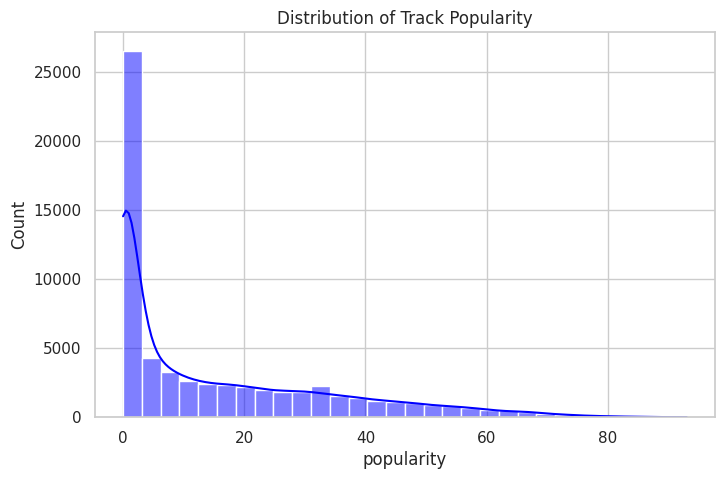

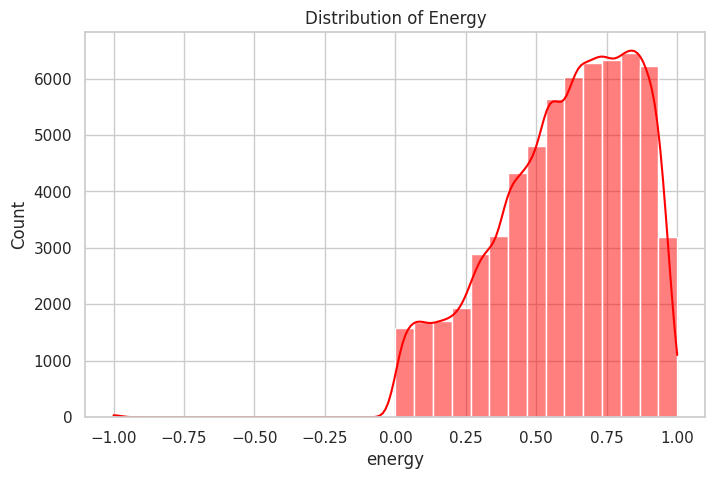

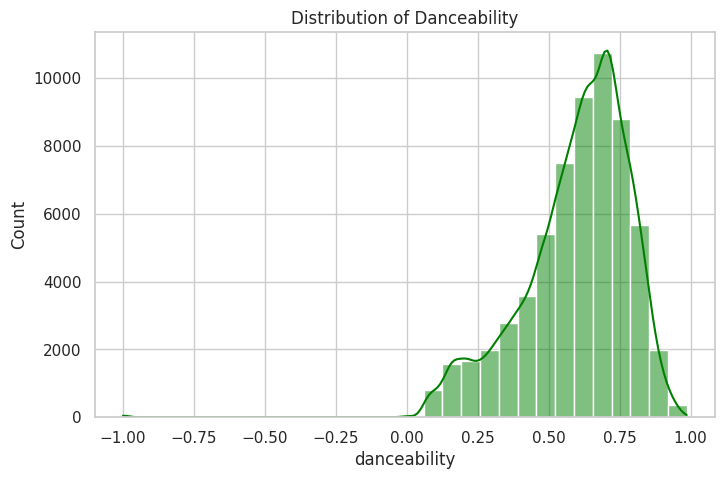

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['popularity'], bins=30, kde=True, color="blue")
plt.title("Distribution of Track Popularity")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['energy'], bins=30, kde=True, color="red")
plt.title("Distribution of Energy")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['danceability'], bins=30, kde=True, color="green")
plt.title("Distribution of Danceability")
plt.show()

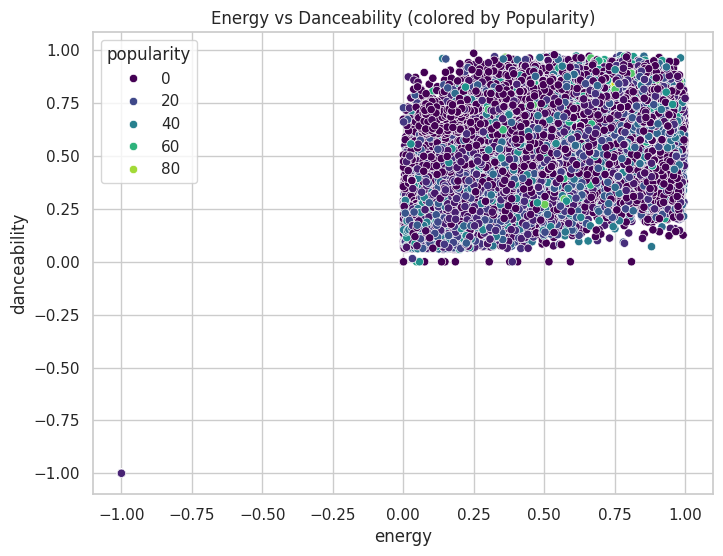

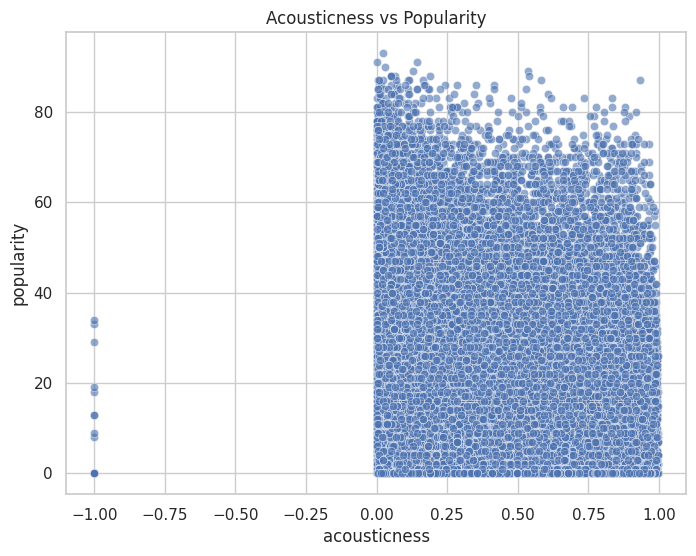

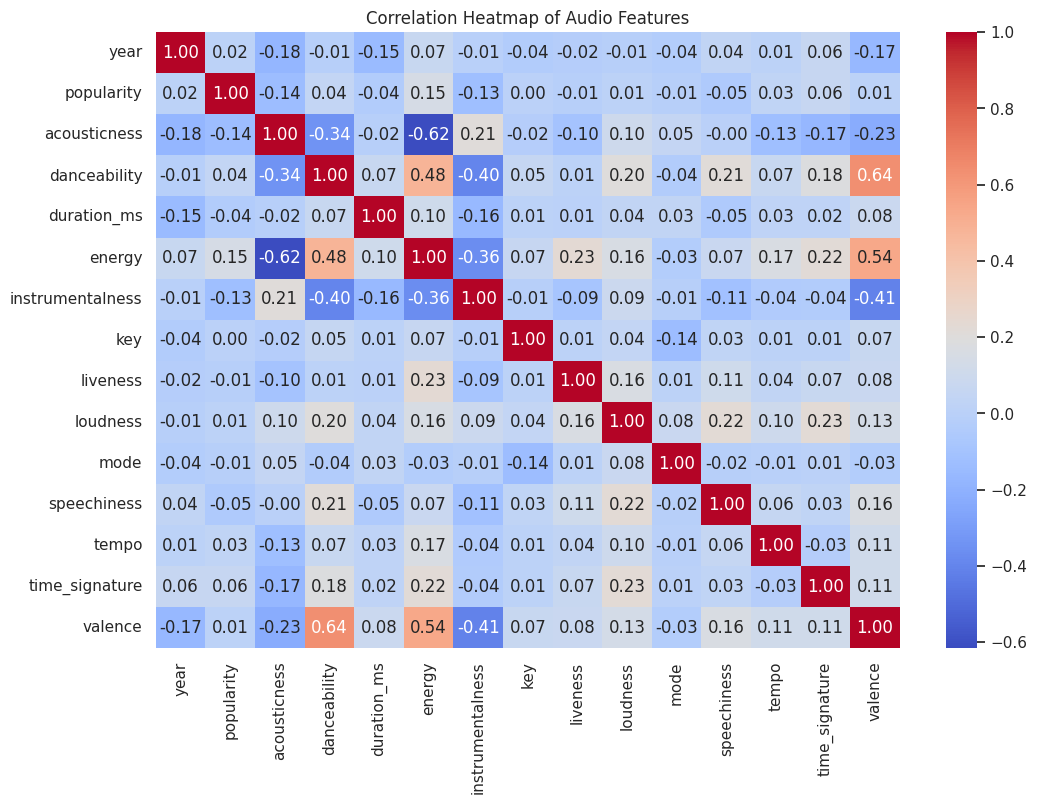

In [18]:
# Analyzing the relationship between energy and danceability, colored by popularity
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="energy", y="danceability", hue="popularity", palette="viridis")
plt.title("Energy vs Danceability (colored by Popularity)")
plt.show()

# Examining the relationship between acousticness and popularity
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="acousticness", y="popularity", alpha=0.6)
plt.title("Acousticness vs Popularity")
plt.show()

# Visualizing the correlation between numerical audio features in the df DataFrame
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Audio Features")
plt.show()

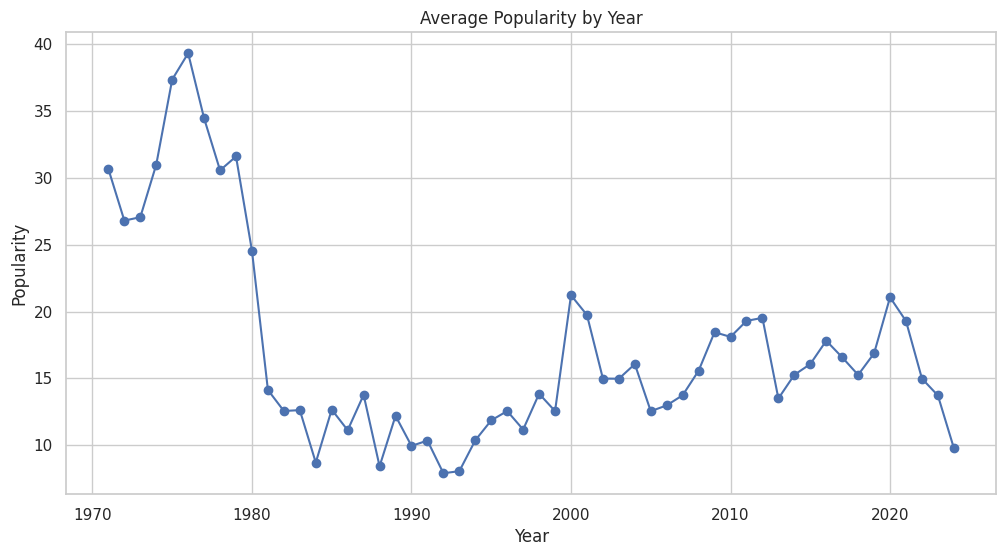

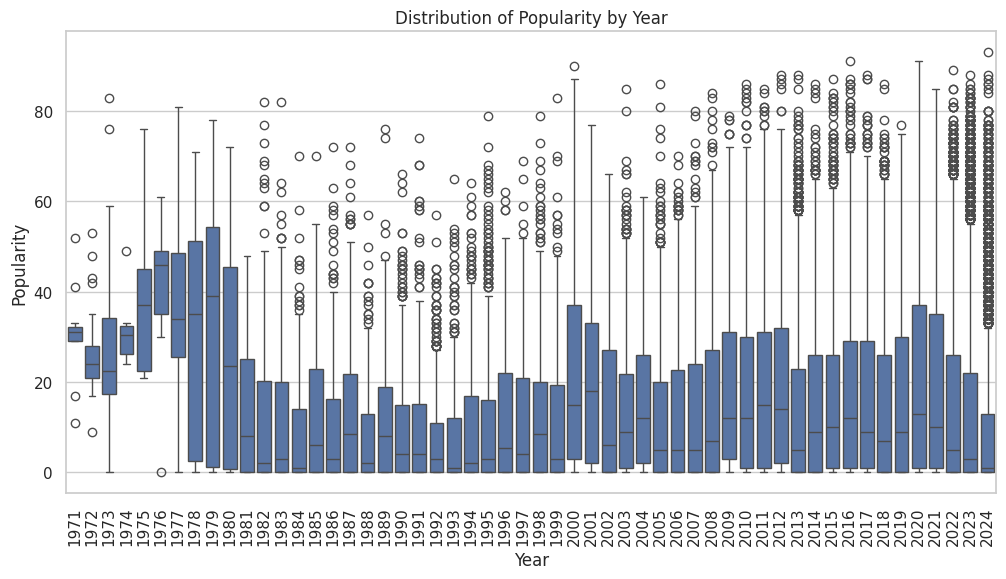

<Figure size 1200x600 with 0 Axes>

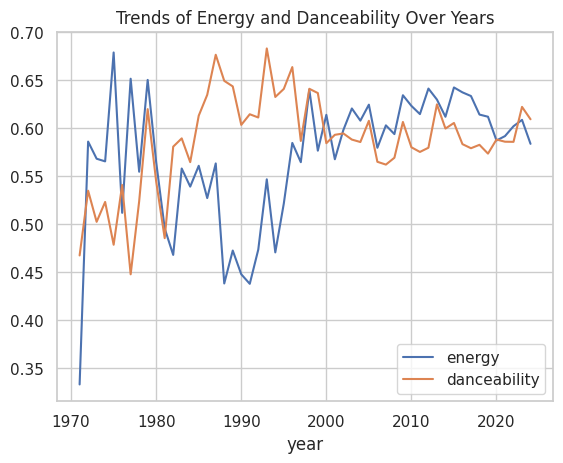

In [13]:
if "year" in df.columns:
    plt.figure(figsize=(12,6))
    df.groupby("year")["popularity"].mean().plot(marker='o')
    plt.title("Average Popularity by Year")
    plt.xlabel("Year")
    plt.ylabel("Popularity")
    plt.show()

    plt.figure(figsize=(12,6))
    sns.boxplot(data=df, x="year", y="popularity")
    plt.title("Distribution of Popularity by Year")
    plt.xlabel("Year")
    plt.ylabel("Popularity")
    plt.xticks(rotation=90)
    plt.show()

    plt.figure(figsize=(12,6))
    df.groupby("year")[["energy","danceability"]].mean().plot()
    plt.title("Trends of Energy and Danceability Over Years")
    plt.show()

/tmp/ipython-input-403134533.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette="magma")


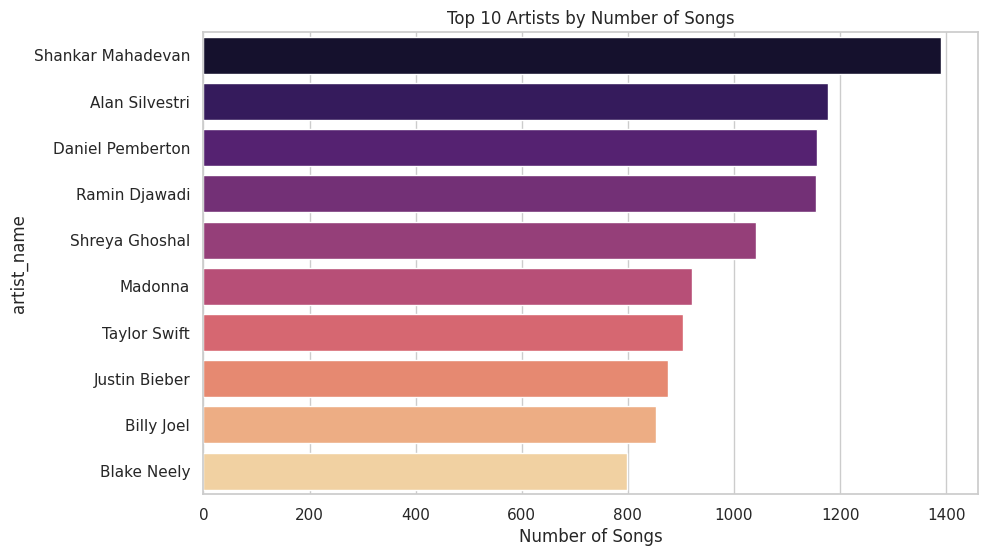

/tmp/ipython-input-403134533.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_artists.values, y=popular_artists.index, palette="coolwarm")


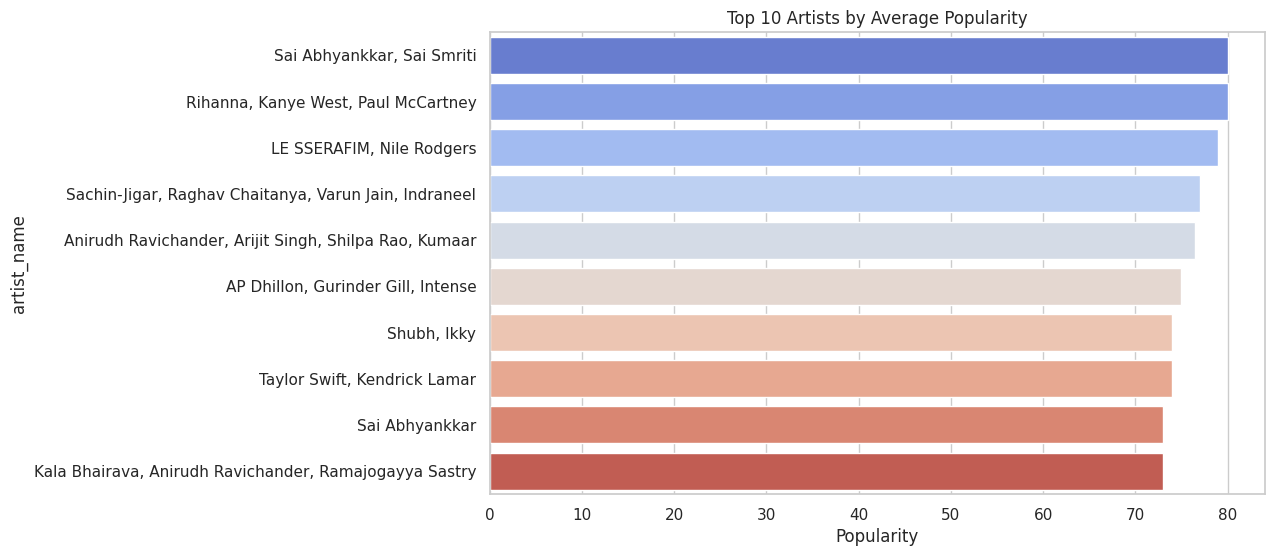

In [14]:
top_artists = df['artist_name'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette="magma")
plt.title("Top 10 Artists by Number of Songs")
plt.xlabel("Number of Songs")
plt.show()

popular_artists = df.groupby("artist_name")["popularity"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=popular_artists.values, y=popular_artists.index, palette="coolwarm")
plt.title("Top 10 Artists by Average Popularity")
plt.xlabel("Popularity")
plt.show()


In [15]:
longest_song = df.loc[df['duration_ms'].idxmax()]
shortest_song = df.loc[df['duration_ms'].idxmin()]
most_popular_song = df.loc[df['popularity'].idxmax()]

print("🎵 Longest Song:", longest_song['track_name'], "by", longest_song['artist_name'])
print("🎵 Shortest Song:", shortest_song['track_name'], "by", shortest_song['artist_name'])
print("🔥 Most Popular Song:", most_popular_song['track_name'], "by", most_popular_song['artist_name'])


🎵 Longest Song: 52 Non Stop Dilbar Dilbar Remix(Remix By Kedrock,Sd Style) by Arya Acharya, Aastha Gill, Amaal Mallik, Ankit Tiwari, Arijit Singh, Badshah, Darshan Raval, Dev Negi, Dhvani Bhanushali, Divya Kumar, Guru Randhawa, Ikka, Jassie Gill, Jubin Nautiyal, Mika Singh, Neha Kakkar, Shreya Ghoshal, Sonu Nigam, Tulsi Kumar, Yo Yo Honey Singh, Aman Hayer, Amit Trivedi, Anand Raj Anand, Anu Malik, Arko, Goldboy, Gourov-Roshin, Haji Springer, Himesh Reshammiya, Millind Gaba, Mithoon, Music Mg, Panjabi MC, Preet Hundal, Rajat Nagpal, Rochak Kohli, Sachin-Jigar, Sanjay Leela Bhansali, Sukh-E Muzical Doctorz, Tanishk Bagchi, Vee, Zack Knight
🎵 Shortest Song: Silly Stroller by Blake Neely
🔥 Most Popular Song: Big Dawgs by Hanumankind, Kalmi


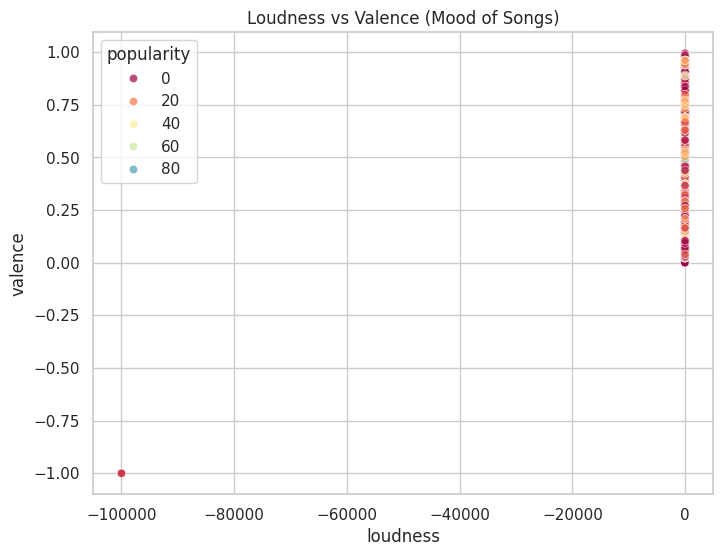

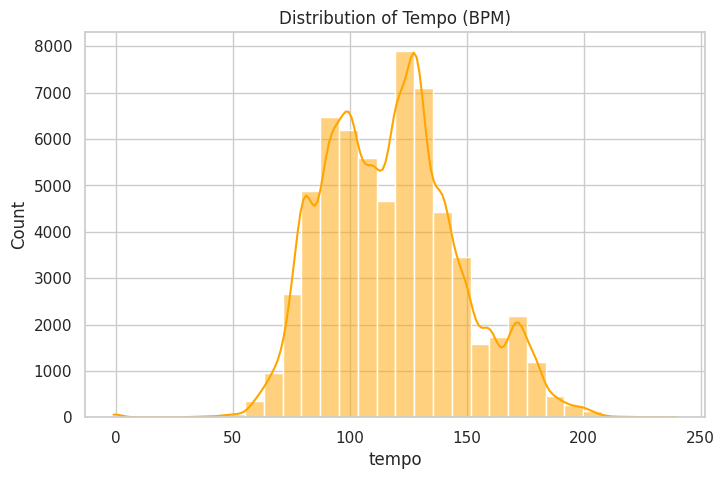

/tmp/ipython-input-1338211832.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="mode", palette="Set2")


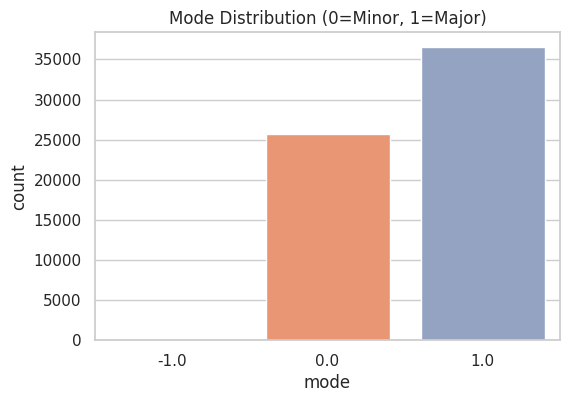

/tmp/ipython-input-1338211832.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="key", palette="husl")


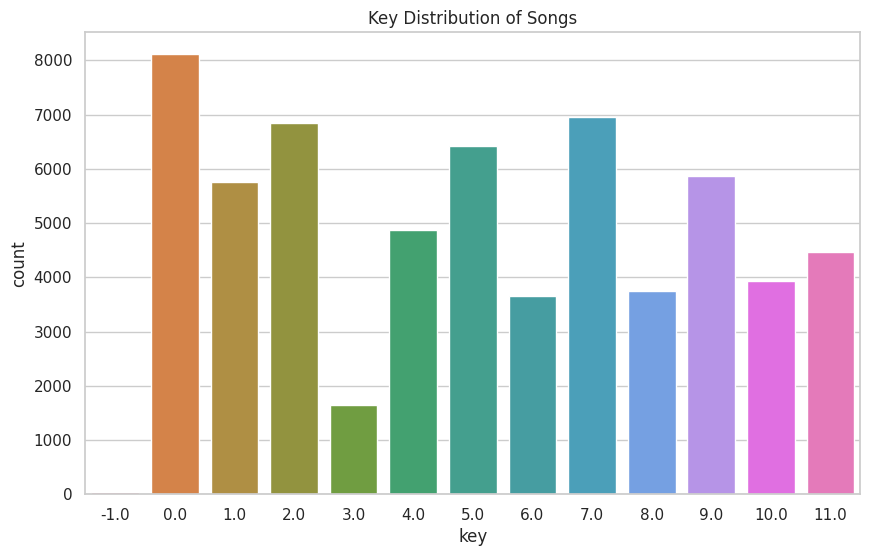


✅ Project Completed Successfully!


In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="loudness", y="valence", hue="popularity", alpha=0.7, palette="Spectral")
plt.title("Loudness vs Valence (Mood of Songs)")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['tempo'], bins=30, kde=True, color="orange")
plt.title("Distribution of Tempo (BPM)")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="mode", palette="Set2")
plt.title("Mode Distribution (0=Minor, 1=Major)")
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=df, x="key", palette="husl")
plt.title("Key Distribution of Songs")
plt.show()

print("\n✅ Project Completed Successfully!")